In [1]:
import math
import json
import librosa
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [5]:
def preprocess(dataset_path, num_mfcc=40, n_fft=2048, hop_length=512, num_segment=10):
    data = {"labels": [], "mfcc": []}
    sample_rate = 22050
    samples_per_segment = int(sample_rate * 30 / num_segment)

    for label_idx, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath == dataset_path:
            continue
        # print(dirpath, label_idx-1)

        for f in sorted(filenames):
            if not f.endswith(".wav"):
                continue
            file_path = 'best_testset_segmented/' + str(str(dirpath).split('\\')[-1]) + '/' + str(f)
            print("Track Name: ", file_path)

            # try:
            y, sr = librosa.load(file_path, sr=sample_rate)
                # print(y)
            # except:
            #     continue
            for n in range(num_segment):
                mfcc = librosa.feature.mfcc(y[samples_per_segment*n:samples_per_segment*(n+1)],
                                            sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                mfcc = mfcc.T
                print(len(mfcc))
                print(math.ceil(samples_per_segment / hop_length))
                if len(mfcc) == math.ceil(samples_per_segment / hop_length):
                    data["mfcc"].append(mfcc.tolist())
                    data["labels"].append(label_idx-1)

    return data

In [18]:
preprocess('best_dataset_segmented')

best_dataset_segmented\edm 0
best_dataset_segmented\hiphop 1
best_dataset_segmented\khiphop 2
best_dataset_segmented\krnb 3
best_dataset_segmented\pop 4
best_dataset_segmented\rnb 5
best_dataset_segmented\vpop 6


In [ ]:
# mfcc_data = preprocess('best_dataset_segmented')
# mfcc_data

In [10]:
np.save("mfcc_custom.npy", mfcc_data)

In [2]:
mfcc_data = np.load('mfcc_custom.npy', allow_pickle=True).item()

In [4]:
len(mfcc_data['mfcc'])

7810

In [ ]:
mfcc_data_test = preprocess('best_testset_segmented')

In [7]:
np.save("mfcc_custom_test.npy", mfcc_data_test)

In [3]:
# x = np.array(mfcc_data["mfcc"])
y = np.array(mfcc_data["labels"])

# x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
# y = tf.keras.utils.to_categorical(y, num_classes=10)

# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.2)

In [4]:
unique, counts = np.unique(y, return_counts=True)

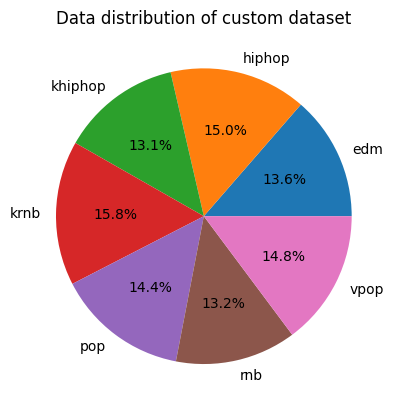

In [5]:
from matplotlib import pyplot as plt
genres = ['edm', 'hiphop', 'khiphop', 'krnb', 'pop', 'rnb', 'vpop']
plt.pie(counts, labels=genres, autopct='%1.1f%%')
plt.title('Data distribution of custom dataset')
plt.savefig('mfcc_custom_genre_pie_chart.png', dpi=300)

In [51]:
x_train.shape
y_train.shape
x_val.shape
y_val.shape

(2436, 10)

In [41]:
x_train = x
y_train = y

In [36]:
y_val.shape

(1172, 10)

In [43]:
mfcc_data = 0
mfcc_data_test = 0

In [52]:
input_shape = x_train.shape[1:]
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu',padding='valid', input_shape=input_shape),
    layers.MaxPooling2D(2, padding='same'),

    layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
    layers.MaxPooling2D(2, padding='same'),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), activation='relu',padding='valid'),
    layers.MaxPooling2D(2, padding='same'),
    layers.Dropout(0.3),

    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics ='acc')
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 38, 32)       320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 19, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 17, 128)       36992     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 9, 128)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 31, 9, 128)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 7, 128)       

In [53]:
history = cnn_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40, verbose=2, batch_size=32)

Epoch 1/40
245/245 - 31s - loss: 0.2516 - acc: 0.3524 - val_loss: 0.2374 - val_acc: 0.4191 - 31s/epoch - 126ms/step
Epoch 2/40
245/245 - 29s - loss: 0.2168 - acc: 0.4644 - val_loss: 0.2405 - val_acc: 0.4085 - 29s/epoch - 118ms/step
Epoch 3/40
245/245 - 29s - loss: 0.1936 - acc: 0.5437 - val_loss: 0.2395 - val_acc: 0.3875 - 29s/epoch - 118ms/step
Epoch 4/40
245/245 - 29s - loss: 0.1704 - acc: 0.6183 - val_loss: 0.2598 - val_acc: 0.4503 - 29s/epoch - 119ms/step
Epoch 5/40
245/245 - 29s - loss: 0.1539 - acc: 0.6672 - val_loss: 0.2604 - val_acc: 0.4388 - 29s/epoch - 120ms/step
Epoch 6/40
245/245 - 29s - loss: 0.1340 - acc: 0.7197 - val_loss: 0.2264 - val_acc: 0.4758 - 29s/epoch - 119ms/step
Epoch 7/40
245/245 - 29s - loss: 0.1147 - acc: 0.7652 - val_loss: 0.2706 - val_acc: 0.4791 - 29s/epoch - 120ms/step
Epoch 8/40
245/245 - 31s - loss: 0.0988 - acc: 0.8102 - val_loss: 0.2885 - val_acc: 0.4483 - 31s/epoch - 125ms/step
Epoch 9/40
245/245 - 32s - loss: 0.0885 - acc: 0.8298 - val_loss: 0.2976

In [37]:
history

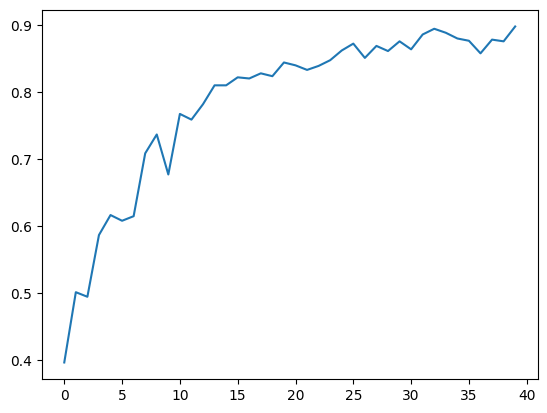

In [57]:
from matplotlib import pyplot as plt
plt.plot(history.history.get('val_acc'))

In [59]:
y_test

array([1, 2, 5, ..., 1, 3, 0], dtype=int64)

In [50]:
#Save the model
cnn_model.save('cnn_model_custom.h5')

In [54]:
#Save the model
cnn_model.save('cnn_model_custom_test.h5')

In [92]:
classes = []
classes_test = []
for i in range(7):
    classes.append(x_test[y_test[:,i]==1])
    classes_test.append(y_test[y_test[:,i]==1])

In [93]:
test_acc_list = []

In [94]:
for i in range(len(classes)):
    y_pred_class = cnn_model.predict(classes[i])
    y_pred_class = np.argmax(y_pred_class, axis=1)
    y_test_class = np.argmax(classes_test[i], axis=1)
    test_acc_list.append(np.sum(y_pred_class == y_test_class)/len(y_test_class))
    print("Accuracy for class ", i, " is ", np.sum(y_pred_class==y_test_class)/len(y_pred_class))

9/9 [==============================] - 0s 30ms/step
Accuracy for class  0  is  0.9133574007220217
9/9 [==============================] - 0s 34ms/step
Accuracy for class  1  is  0.9679715302491103
9/9 [==============================] - 0s 28ms/step
Accuracy for class  2  is  0.7924528301886793
10/10 [==============================] - 1s 32ms/step
Accuracy for class  3  is  0.879746835443038
9/9 [==============================] - 0s 28ms/step
Accuracy for class  4  is  0.8597785977859779
9/9 [==============================] - 0s 32ms/step
Accuracy for class  5  is  0.8966789667896679
9/9 [==============================] - 0s 31ms/step
Accuracy for class  6  is  0.9080882352941176


In [95]:
test_acc_list

[0.9133574007220217,
 0.9679715302491103,
 0.7924528301886793,
 0.879746835443038,
 0.8597785977859779,
 0.8966789667896679,
 0.9080882352941176]

In [98]:
run1 = [0.9133574007220217,
 0.9679715302491103,
 0.7924528301886793,
 0.879746835443038,
 0.8597785977859779,
 0.8966789667896679,
 0.9080882352941176]

run2 = [0.9163763066202091,
 0.9434628975265018,
 0.8638132295719845,
 0.8789808917197452,
 0.8921933085501859,
 0.8867924528301887,
 0.8884892086330936]

run3 = [0.8648648648648649,
 0.875,
 0.8806584362139918,
 0.9076923076923077,
 0.8912280701754386,
 0.8973384030418251,
 0.9060150375939849]

run4 = [0.945054945054945,
 0.9735973597359736,
 0.8514056224899599,
 0.8813559322033898,
 0.8222222222222222,
 0.9101123595505618,
 0.8682432432432432]

run5 = [0.8482490272373541,
 0.93,
 0.9259259259259259,
 0.9335347432024169,
 0.8608058608058609,
 0.831275720164609,
 0.8817204301075269]

In [139]:
run_acc_list = np.concatenate((run1, run2, run3, run4, run5), axis=0)
run_acc_list = run_acc_list.reshape(5,7)
run_acc_list

array([[0.9133574 , 0.96797153, 0.79245283, 0.87974684, 0.8597786 ,
        0.89667897, 0.90808824],
       [0.91637631, 0.9434629 , 0.86381323, 0.87898089, 0.89219331,
        0.88679245, 0.88848921],
       [0.86486486, 0.875     , 0.88065844, 0.90769231, 0.89122807,
        0.8973384 , 0.90601504],
       [0.94505495, 0.97359736, 0.85140562, 0.88135593, 0.82222222,
        0.91011236, 0.86824324],
       [0.84824903, 0.93      , 0.92592593, 0.93353474, 0.86080586,
        0.83127572, 0.88172043]])

In [141]:
genre_acc = np.mean(run_acc_list, axis=0)
genre_acc

array([0.89758051, 0.93800636, 0.86285121, 0.89626214, 0.86524561,
       0.88443958, 0.89051123])

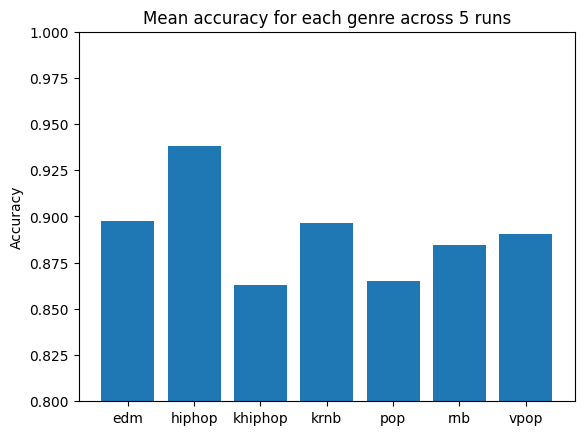

In [175]:
from matplotlib import pyplot as plt
genres = ['edm', 'hiphop', 'khiphop', 'krnb', 'pop', 'rnb', 'vpop']
plt.bar(genres, genre_acc)
plt.ylim(0.8,1)
plt.ylabel('Accuracy')
plt.title('Mean accuracy for each genre across 5 runs')
plt.savefig('mfcc_custom_genre_acc.png', dpi=300)

In [151]:
genre_variances = np.var(run_acc_list, axis=0)
genre_variances

array([0.00127198, 0.00124566, 0.00187668, 0.0004627 , 0.00066038,
       0.00076144, 0.00022531])

In [144]:
genre_std = np.std(run_acc_list, axis=0)
genre_std

array([0.03566489, 0.03529393, 0.04332061, 0.0215104 , 0.02569777,
       0.02759422, 0.01501032])

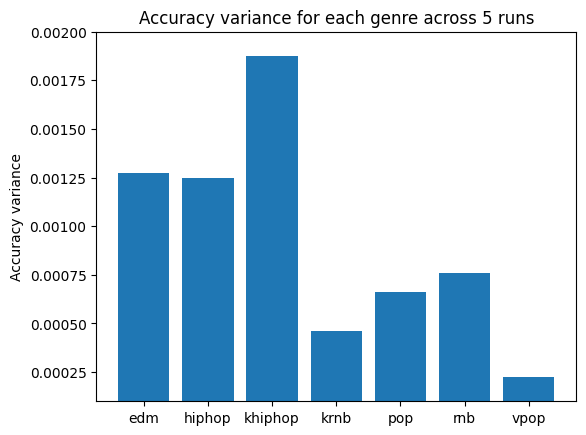

In [167]:
from matplotlib import pyplot as plt
genres = ['edm', 'hiphop', 'khiphop', 'krnb', 'pop', 'rnb', 'vpop']
plt.bar(genres, genre_variances)
plt.ylim(0.0001,0.002)
plt.ylabel('Accuracy variance')
plt.title('Accuracy variance for each genre across 5 runs')
plt.subplots_adjust(left=0.15)
plt.savefig('mfcc_custom_genre_var.png', dpi=300)

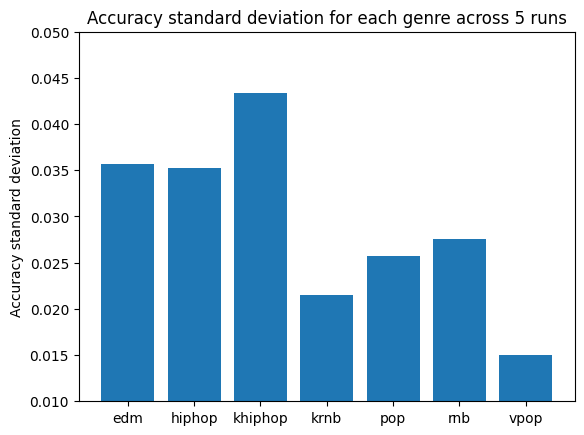

In [168]:
from matplotlib import pyplot as plt
genres = ['edm', 'hiphop', 'khiphop', 'krnb', 'pop', 'rnb', 'vpop']
plt.bar(genres, genre_std)
plt.ylim(0.01,0.05)
plt.ylabel('Accuracy standard deviation')
plt.title('Accuracy standard deviation for each genre across 5 runs')
plt.savefig('mfcc_custom_genre_std.png', dpi=300)

In [146]:
run_acc = np.mean(run_acc_list, axis=1)
run_acc

array([0.88829634, 0.89572976, 0.88897102, 0.89314167, 0.88735882])

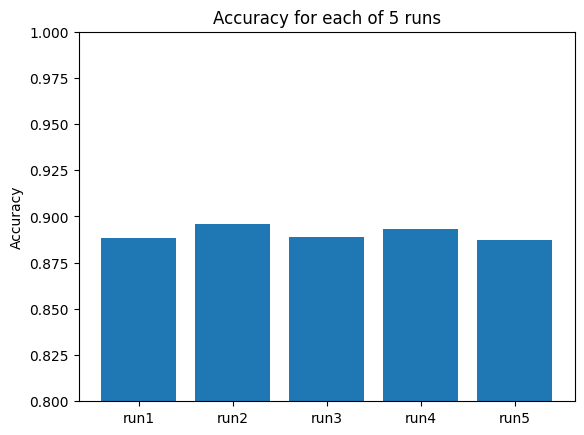

In [177]:
from matplotlib import pyplot as plt
genres = ['run1', 'run2', 'run3', 'run4', 'run5']
plt.bar(genres, run_acc)
plt.ylim(0.8,1)
plt.ylabel('Accuracy')
plt.title('Accuracy for each of 5 runs')
plt.savefig('mfcc_custom_runs_acc.png', dpi=300)

In [159]:
run_mean = np.mean(run_acc)
run_mean

0.8906995200985979

In [157]:
run_var = np.var(run_acc)
run_var

1.0238132932344312e-05

In [158]:
run_std = np.std(run_acc)
run_std

0.0031997082573797745

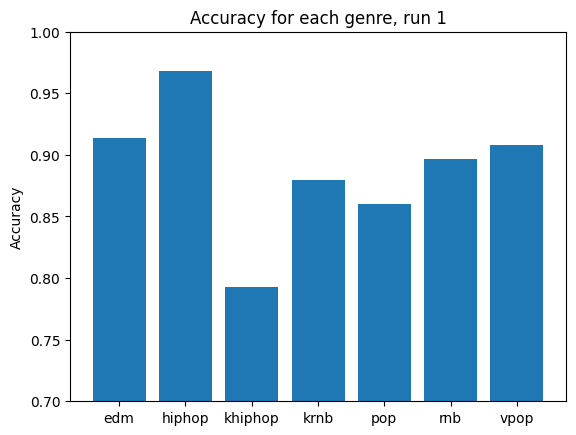

In [174]:
from matplotlib import pyplot as plt
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
genres = ['edm', 'hiphop', 'khiphop', 'krnb', 'pop', 'rnb', 'vpop']
plt.bar(genres,run1)
plt.ylim(0.7,1)
plt.ylabel('Accuracy')
plt.title('Accuracy for each genre, run 1')
plt.savefig('mfcc_custom_run1.png', dpi=300)

In [6]:
x = np.array(mfcc_data_test["mfcc"])
y = np.array(mfcc_data_test["labels"])

x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
y = tf.keras.utils.to_categorical(y, num_classes=10)

# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.2)
x.shape

(2436, 130, 40, 1)

In [7]:
x_val= x
y_val = y

In [12]:
y.shape

(7810, 10)

In [6]:
mfcc_data_test = np.load('mfcc_custom_test.npy', allow_pickle=True).item()

In [7]:
y = np.array(mfcc_data_test["labels"])
unique, counts = np.unique(y, return_counts=True)

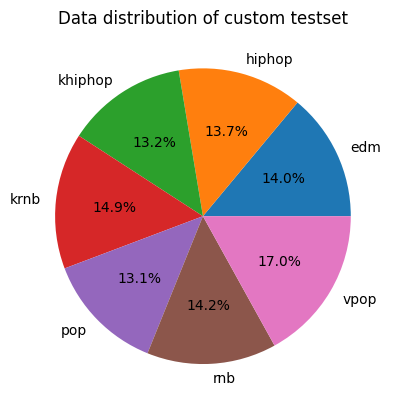

In [8]:
from matplotlib import pyplot as plt
genres = ['edm', 'hiphop', 'khiphop', 'krnb', 'pop', 'rnb', 'vpop']
plt.pie(counts, labels=genres, autopct='%1.1f%%')
plt.title('Data distribution of custom testset')
plt.savefig('mfcc_custom_test_genre_pie_chart.png', dpi=300)

In [5]:
cnn_model = keras.models.load_model('cnn_model_custom_test.h5')

In [8]:
classes = []
classes_test = []
for i in range(7):
    classes.append(x_val[y_val[:,i]==1])
    classes_test.append(y_val[y_val[:,i]==1])

In [58]:
y_val.shape

(2436, 10)

In [9]:
test_acc_list = []
genre_pred_list = []
for i in range(len(classes)):
    y_pred_class = cnn_model.predict(classes[i])
    y_pred_class = np.argmax(y_pred_class, axis=1)
    genre_pred_list.append(y_pred_class)
    y_test_class = np.argmax(classes_test[i], axis=1)
    test_acc_list.append(np.sum(y_pred_class == y_test_class)/len(y_test_class))
    print("Accuracy for class ", i, " is ", np.sum(y_pred_class==y_test_class)/len(y_pred_class))

11/11 [==============================] - 0s 32ms/step
Accuracy for class  0  is  0.6617647058823529
11/11 [==============================] - 0s 29ms/step
Accuracy for class  1  is  0.5225225225225225
11/11 [==============================] - 0s 32ms/step
Accuracy for class  2  is  0.5279503105590062
12/12 [==============================] - 0s 30ms/step
Accuracy for class  3  is  0.5316804407713499
10/10 [==============================] - 0s 31ms/step
Accuracy for class  4  is  0.3625
11/11 [==============================] - 0s 33ms/step
Accuracy for class  5  is  0.22608695652173913
13/13 [==============================] - 0s 32ms/step
Accuracy for class  6  is  0.5278450363196125


In [41]:
import pandas as pd
df = pd.DataFrame()
dict_list = []
for i in range(7):
    unique, counts = np.unique(genre_pred_list[i],return_counts=True)
    a = dict(zip(unique, counts))
    for j in a:
        # print((genres[i], genres[j], a[j]))
        # exit()
        # print(genres[i], genres[j], a[j])
        for k in range(a[j]):
            dict_list.append({'genre':genres[i], 'pred_genre':genres[j]})
        # dict_list.append({'genre':genres[i], 'pred_genre':genres[j], 'count':a[j]})

In [42]:
df = pd.DataFrame(dict_list)
df

,genre,pred_genre
0,edm,edm
1,edm,edm
2,edm,edm
3,edm,edm
4,edm,edm
...,...,...
2431,vpop,vpop
2432,vpop,vpop
2433,vpop,vpop
2434,vpop,vpop


In [45]:
dfc = pd.crosstab(index=df.genre, columns=df.pred_genre, normalize="index").mul(100).round(1)
dfc

pred_genre,edm,hiphop,khiphop,krnb,pop,rnb,vpop
genre,,,,,,,
edm,66.2,4.1,3.2,3.5,9.1,3.5,10.3
hiphop,1.5,52.3,29.7,5.1,3.0,3.6,4.8
khiphop,3.4,30.1,52.8,1.2,10.9,0.6,0.9
krnb,0.8,0.3,13.8,53.2,3.9,12.4,15.7
pop,41.9,2.5,2.8,3.4,36.2,2.2,10.9
rnb,7.2,2.0,8.1,35.7,5.5,22.6,18.8
vpop,11.4,0.7,9.7,10.9,7.0,7.5,52.8


<Figure size 640x480 with 0 Axes>

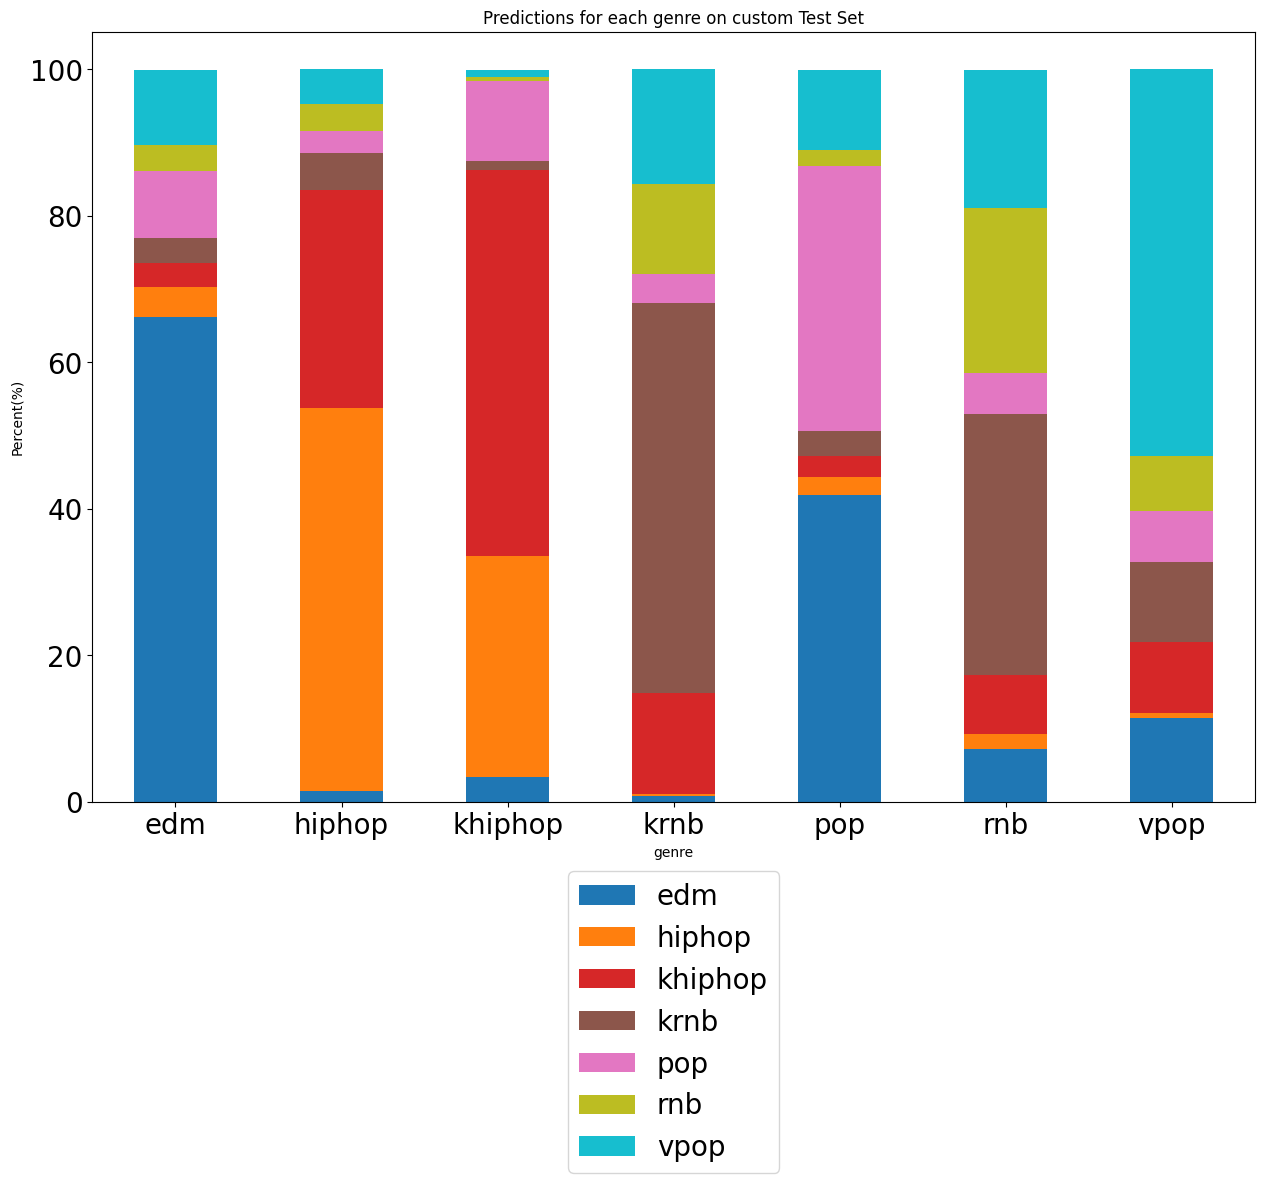

In [88]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = dfc.plot(kind='bar', ylabel='Percent(%)', stacked=True, rot=0, figsize=(15, 10),colormap='tab10', fontsize=20, title='Predictions for each genre on custom Test Set')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), fontsize=20)
ax.figure.savefig('mfcc_custom_genre_pred.png', dpi=300, pad_inches=0.5, bbox_inches='tight')

In [33]:
dfc = df.groupby(['year'])['fuelType'].value_counts(normalize=True).mul(100).round(1).unstack(level=1)

In [13]:
genres = ['edm', 'hiphop', 'khiphop', 'krnb', 'pop', 'rnb', 'vpop']

In [19]:
genre_pred_np = np.stack(genre_pred_list)

ValueError: all input arrays must have the same shape

In [17]:
genre_pred_list.shape

(2436, 10)

In [1]:
test_acc_final = [0.6617647058823529,
0.5225225225225225,
0.5279503105590062,
0.5316804407713499,
0.3625,
0.22608695652173913,
0.5278450363196125]

In [82]:
from matplotlib import pyplot as plt
genres = ['edm', 'hiphop', 'khiphop', 'krnb', 'pop', 'rnb', 'vpop']
plt.bar(genres, test_acc_final)
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Accuracy for each genre on new songs test set')
plt.savefig('mfcc_custom_genre_test_acc.png', dpi=300)

NameError: name 'test_acc_final' is not defined

In [61]:
y_pred = cnn_model.predict(x_val)
y_pred = np.argmax(y_pred, axis=1)
y_test_test = np.argmax(y_val, axis=1)

print(np.sum(y_pred == y_test_test)/len(y_test_test))

77/77 [==============================] - 2s 30ms/step
0.4819376026272578


In [16]:
y_pred = cnn_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_test = np.argmax(y_test, axis=1)

print(np.sum(y_pred == y_test_test)/len(y_test_test))

62/62 [==============================] - 2s 31ms/step
0.8991295442908346
